In [4]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


2022-08-10 16:37:43.380293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:37:43.385444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:37:43.386156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
tf.__version__

'2.9.1'

In [5]:
tf.keras.__version__

'2.9.0'

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255.0

In [11]:
class_names = ["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2022-08-10 16:46:23.286180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-10 16:46:23.287722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:46:23.289036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:46:23.289696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[ 0.01985584,  0.01480813, -0.04321933, ...,  0.00504483,
        -0.06126685,  0.028488  ],
       [-0.02896162, -0.02368968, -0.0428375 , ..., -0.02482782,
        -0.05744322, -0.01252468],
       [-0.03490535, -0.02945112, -0.04912729, ..., -0.0626995 ,
         0.05415219,  0.00634449],
       ...,
       [-0.02132732, -0.0019026 , -0.00930978, ...,  0.07363044,
        -0.02051507, -0.04118285],
       [-0.0718832 ,  0.02536017,  0.06097235, ..., -0.0368207 ,
        -0.03529854, -0.0522493 ],
       [-0.02969551,  0.01087201, -0.0577453 , ..., -0.03286706,
        -0.04050714,  0.06873465]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
model.compile(loss = "sparse_categorical_crossentropy",\
              optimizer="sgd",\
              metrics=["accuracy"])

In [26]:
history=model.fit(X_train,y_train,epochs=30,\
                  validation_data=(X_valid,y_valid))

Epoch 1/30
   1/1719 [..............................] - ETA: 23:52 - loss: 2.3750 - accuracy: 0.0938

2022-08-10 16:52:04.579196: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7165 - accuracy: 0.7644 - val_loss: 0.5161 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4863 - accuracy: 0.8313 - val_loss: 0.4765 - val_accuracy: 0.8318
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4423 - accuracy: 0.8453 - val_loss: 0.4099 - val_accuracy: 0.8660
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4154 - accuracy: 0.8537 - val_loss: 0.3915 - val_accuracy: 0.8682
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3959 - accuracy: 0.8610 - val_loss: 0.4075 - val_accuracy: 0.8540
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3793 - accuracy: 0.8658 - val_loss: 0.3758 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3645 - accuracy: 0.8711 - val_loss: 0.3611 - val_accuracy: 0.8744
Epo

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [30]:
history.history

{'loss': [0.7165312767028809,
  0.4862893521785736,
  0.4422610104084015,
  0.41537341475486755,
  0.39585670828819275,
  0.3792623281478882,
  0.3644563555717468,
  0.35482102632522583,
  0.34428539872169495,
  0.3349561393260956,
  0.32724669575691223,
  0.31924179196357727,
  0.31202083826065063,
  0.3059212267398834,
  0.2982439696788788,
  0.29249143600463867,
  0.28775155544281006,
  0.2815961241722107,
  0.2765265107154846,
  0.27184662222862244,
  0.2668443024158478,
  0.26150423288345337,
  0.2582852840423584,
  0.253955215215683,
  0.24848812818527222,
  0.2452559620141983,
  0.24120774865150452,
  0.23767821490764618,
  0.23408108949661255,
  0.22931744158267975],
 'accuracy': [0.7643636465072632,
  0.8313454389572144,
  0.8453272581100464,
  0.8537272810935974,
  0.8609636425971985,
  0.865818202495575,
  0.8710908889770508,
  0.8745636343955994,
  0.8772181868553162,
  0.8802909255027771,
  0.8828363418579102,
  0.8865818381309509,
  0.8886545300483704,
  0.890272736549377

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

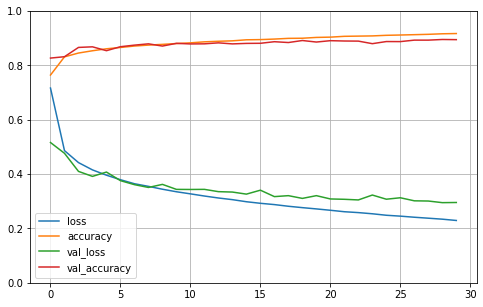

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8843


[0.3259913921356201, 0.8842999935150146]